# CNN

## Step 1 : Load the data

In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [15]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [18]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [19]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [22]:
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [28]:
import matplotlib.pyplot as plt

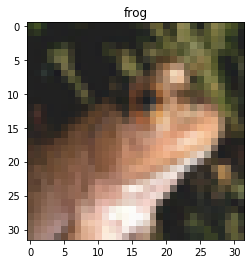

In [33]:
random = np.random.randint(50000)

plt.imshow(x_train[random])
plt.title(labels[y_train[random]])
plt.show()

## Step 2: Bulld the model

We are building a convolution neural network.  

Input -> convolution -> pooling -> convolution -> pooling -> convolution -> pooling -> flatten -> hidden layer -> output

#### OR

Input -> convolution with stride 2 -> convolution with stride 2 -> convolution with stride 2 -> flatten -> hidden layer -> output



In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [37]:
print(x_train[0].shape)

(32, 32, 3)


In [40]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128,(3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dense(10, activation = 'softmax')(x)

model = Model(i,x)



 #   i = Input(shape=x_train[0].shape)

 #   x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(i)
 #   x = BatchNormalization()(x)
 #   x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
 #   x = BatchNormalization()(x)
 #   x = MaxPooling2D((2,2))(x)

 #   x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
 #   x = BatchNormalization()(x)
 #   x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
 #   x = BatchNormalization()(x)
 #   x = MaxPooling2D((2,2))(x)

 #   x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
 #   x = BatchNormalization()(x)
 #   x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
 #   x = BatchNormalization()(x)
 #   x = MaxPooling2D((2,2))(x)

 #   x = Flatten()(x)
 #   x = Dropout(0.2)(x)
 #   x = Dense(1024, activation='relu')(x)
 #   x = Dropout(0.2)(x)
 #   x = Dense(K, activation = 'softmax')(x)


model = Model(i,x)

## Step 3: Train Model

In [45]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4341 - accuracy: 0.4779 - val_loss: 1.2039 - val_accuracy: 0.5756
Epoch 2/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0535 - accuracy: 0.6259 - val_loss: 1.0230 - val_accuracy: 0.6417
Epoch 3/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8480 - accuracy: 0.7008 - val_loss: 0.9517 - val_accuracy: 0.6729
Epoch 4/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6825 - accuracy: 0.7606 - val_loss: 0.9230 - val_accuracy: 0.6843
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5216 - accuracy: 0.8149 - val_loss: 1.0030 - val_accuracy: 0.6881
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3839 - accuracy: 0.8642 - val_loss: 1.0728 - val_accuracy: 0.6866
Epoch 7/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.2624 - accuracy: 0.9080 - val_loss: 1.3527 -

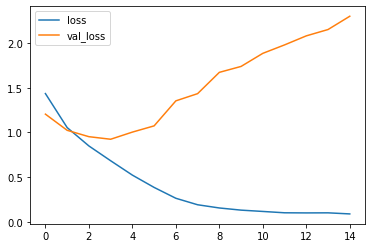

In [46]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

## Step 4: Evaluate the model

In [47]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1180672   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Confusion matrix, without normalization
[[728  27  64  12  23  10  15  21  61  39]
 [ 19 784  13   6   1  15   4   6  29 123]
 [ 55   7 552  47 131  58  73  46  12  19]
 [ 23  10 101 368  95 221  85  54  14  29]
 [ 26   9  82  47 659  37  55  58  14  13]
 [ 11   5  74 115  80 614  36  47   8  10]
 [ 12   9  53  54  42  42 752  14   7  15]
 [ 13   5  28  26  74  69   8 745   5  27]
 [ 71  54  29  15  16  11   5   4 767  28]
 [ 27  88  20  18   7  16   9  17  32 766]]


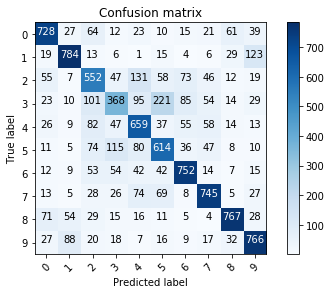

In [102]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Step 5: Make a prediction

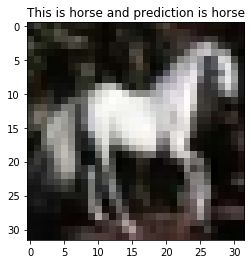

In [104]:
random = np.random.randint(len(x_test[0]))

plt.imshow(x_test[random])
plt.title("This is %s and prediction is %s" % (labels[y_test[random]], labels[np.argmax(model.predict(x_test)[random])]))
plt.show()

In [89]:
list_of_wrongs = np.where(np.argmax(model.predict(x_test), axis = 1)  != y_test)
list_of_wrongs = list_of_wrongs[0]

Let's pick a random photo of which prediction is wrong

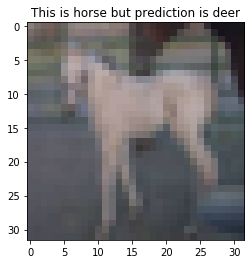

In [105]:
random = np.random.choice(list_of_wrongs)

plt.imshow(x_test[random])
plt.title("This is %s but prediction is %s" % (labels[y_test[random]], labels[np.argmax(model.predict(x_test)[random])]))
plt.show()